In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import sqlite3
from dash import Dash, dcc, html, Input, Output



file_path = r"C:\Users\info\Desktop\project3team11\Resources\final2_cleaned_dataset.csv"
data = pd.read_csv(file_path)

# Define the SQLite Database file
db_file = 'DW_cleaned_data.db' # The SQLite database file name

# Connect to SQLite database (creates the file if it doesn't exist)
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Connect to SQLite database (creates the file if it doesn't exist)
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Define the table schema based on the dataset columns
cursor.execute('''
CREATE TABLE IF NOT EXISTS health_data (
    Year INTEGER,
    Sex TEXT,
    Age TEXT,
    Grade TEXT,
    Race_Ethnicity TEXT,
    DataSource TEXT,
    Location TEXT,
    LocationID TEXT,
    LocationID_1 INTEGER,
    Geolocation TEXT,
    Topic TEXT,
    TopicID TEXT,
    Question TEXT,
    QuestionID TEXT,
    Value REAL,
    DataValueUnit TEXT,
    DataValueType TEXT,
    DataValueTypeID TEXT,
    LowConfidenceLimit REAL,
    HighConfidenceLimit REAL
)
''')

# Commit the table creation
conn.commit()

# Load data from the DataFrame into the SQLite table
data.to_sql('health_data', conn, if_exists='replace', index=False)

# Confirm data insertion by querying the database
row_count = cursor.execute('SELECT COUNT(*) FROM health_data').fetchone()[0]
print(f"Rows inserted into the database: {row_count}")

# Close the connection
conn.close()

Rows inserted into the database: 309215


In [147]:
# Filter data for "Unemployment rate among people 16 years and older in the labor force"
unemployment_data = data[data['Question'] == "Unemployment rate among people 16 years and older in the labor force"]

# Extract the relevant columns
unemployment_by_location = unemployment_data[['Location', 'Value']]

In [148]:
# Step 3: Drop missing values to ensure clean visualization
unemployment_by_location = unemployment_by_location.dropna()

# Step 4: Sort data by unemployment rate for better visualization
unemployment_by_location = unemployment_by_location.sort_values(by='Value', ascending=False)

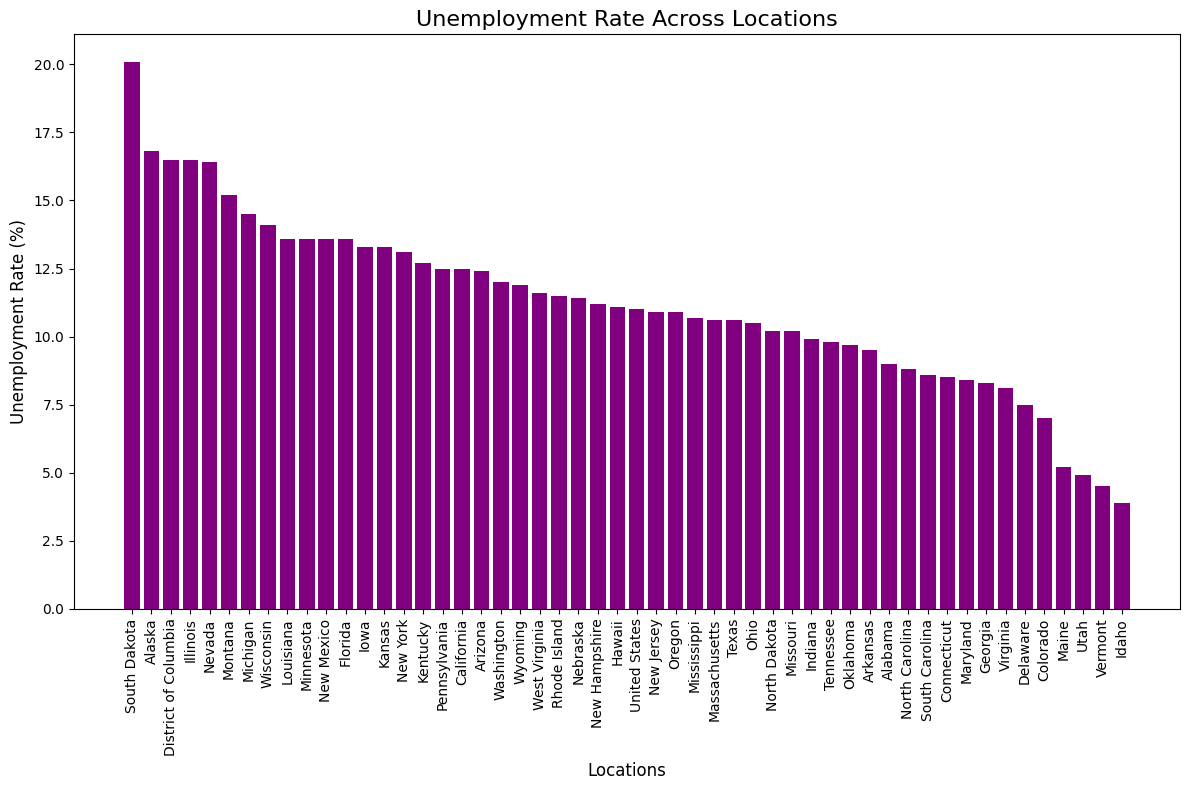

In [149]:
# Step 5: Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(unemployment_by_location['Location'], unemployment_by_location['Value'], color='purple')

# Step 6: Customize the chart
plt.title('Unemployment Rate Across Locations', fontsize=16)
plt.xlabel('Locations', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

# Show the chart
plt.show()

In [150]:
print(data['Topic'].unique())  # Shows unique topics in the dataset


['Social Determinants of Health' 'Alcohol' 'Tobacco' 'Arthritis'
 'Nutrition, Physical Activity, and Weight Status' 'Health Status'
 'Chronic Obstructive Pulmonary Disease' 'Cardiovascular Disease'
 'Mental Health' 'Cognitive Health and Caregiving' 'Immunization'
 'Diabetes' 'Disability' 'Asthma' 'Oral Health' 'Cancer' 'Sleep'
 'Maternal Health' 'Chronic Kidney Disease']


In [151]:
# Calculate the mode for the 'Topic' column
topic_mode = data['Topic'].mode()[0]

print("The mode for the 'Topic' column is:", topic_mode)

The mode for the 'Topic' column is: Cardiovascular Disease


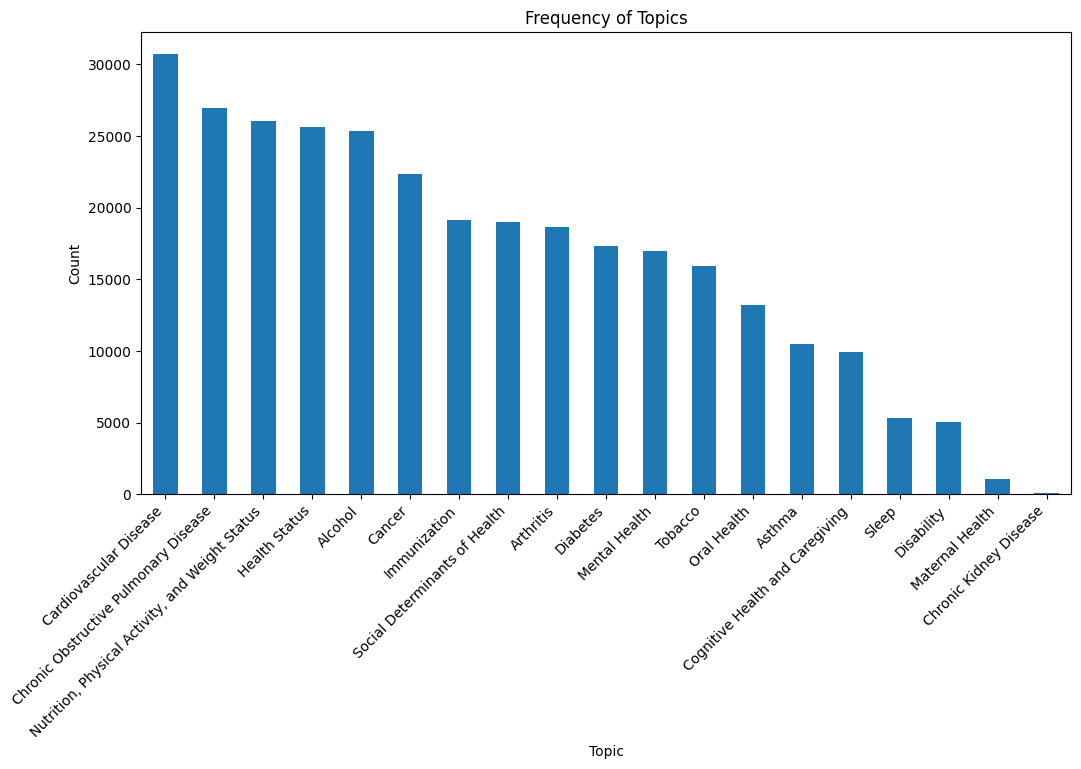

In [152]:
topic_counts = data['Topic'].value_counts()
topic_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Frequency of Topics')
plt.xlabel('Topic')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.show()

In [153]:
print(data['Question'].unique())  # Shows unique questions related to the data

['High school completion among adults aged 18-24'
 'Unemployment rate among people 16 years and older in the labor force'
 'No broadband internet subscription among households'
 'Living below 150% of the poverty threshold among all people'
 'Per capita alcohol consumption among people aged 14 years and older'
 'Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars'
 'Have taken an educational class to learn how to manage arthritis symptoms among adults with arthritis'
 'No leisure-time physical activity among adults'
 'Activity limitation due to arthritis among adults with arthritis'
 'Consumed vegetables less than one time daily among adults'
 'Obesity among adults' 'Frequent physical distress among adults'
 'Work limitation due to arthritis among adults aged 18-64 years with arthritis'
 'Chronic obstructive pulmonary disease among adults'
 'Binge drinking prev

In [154]:
print(data['QuestionID'].unique())  # Shows unique questions related to the data

['SDH02' 'SDH08' 'SDH03' 'SDH01' 'ALC08' 'TOB07' 'ART07' 'NPW06' 'ART02'
 'NPW04' 'NPW14' 'HEA03' 'ART04' 'COPD01' 'ALC06' 'HEA05' 'SDH12' 'CVD02'
 'MEN04' 'CHC01' 'ALC04' 'HEA02' 'NPW09' 'TOB04' 'CHC03' 'CVD04' 'IMM03'
 'TOB06' 'SDH09' 'MEN02' 'CHC02' 'ART01' 'DIA01' 'IMM04' 'IMM01' 'CVD01'
 'NPW02' 'COPD02' 'HEA04' 'MEN05' 'ALC05' 'ART03' 'DIS01' 'CHC04' 'CVD03'
 'ART06' 'ART05' 'IMM02' 'AST02' 'HEA01' 'ORH01' 'CAN06' 'SLP03' 'SDH07'
 'SDH06' 'ORH03' 'ORH06' 'SDH05' 'CAN09' 'ORH02' 'CAN10' 'COPD03' 'CVD06'
 'COPD04' 'SDH04' 'NPW10' 'NPW11' 'SLP01' 'ORH05' 'NPW07' 'ORH04' 'CVD09'
 'COPD06' 'ALC09' 'CVD07' 'DIA04' 'AST01' 'DIA03' 'CVD08' 'COPD05' 'HEA06'
 'DIA02' 'SDH10' 'SDH11' 'TOB05' 'MAT01' 'ORH07' 'MEN03' 'CAN08' 'CAN07'
 'CAN05' 'CAN03' 'CAN01' 'CAN04' 'CAN02' 'CKD01' 'NPW12' 'ALC01' 'NPW05'
 'SLP02' 'ALC07' 'TOB01' 'NPW03' 'NPW08' 'TOB02' 'TOB03' 'NPW13' 'NPW01'
 'MEN01']


In [155]:
# Search for Chronic Disease Incidence
print(data[data['Topic'].str.contains('chronic', case=False, na=False)])


        Year      Sex       Age    Grade  \
3562    2019  Unknown   Unknown  Unknown   
3608    2019   Female   Unknown  Unknown   
3611    2019  Unknown   Unknown  Unknown   
3622    2019  Unknown  Age >=65  Unknown   
3624    2019  Unknown   Unknown  Unknown   
...      ...      ...       ...      ...   
291068  2019  Unknown   Unknown  Unknown   
291069  2019  Unknown   Unknown  Unknown   
291070  2019  Unknown   Unknown  Unknown   
291071  2019  Unknown   Unknown  Unknown   
291072  2019  Unknown   Unknown  Unknown   

                                    Race/Ethnicity DataSource  \
3562                           White, non-Hispanic      BRFSS   
3608                                       Unknown      BRFSS   
3611                           Black, non-Hispanic      BRFSS   
3622                                       Unknown      BRFSS   
3624    Hawaiian or Pacific Islander, non-Hispanic      BRFSS   
...                                            ...        ...   
291068          

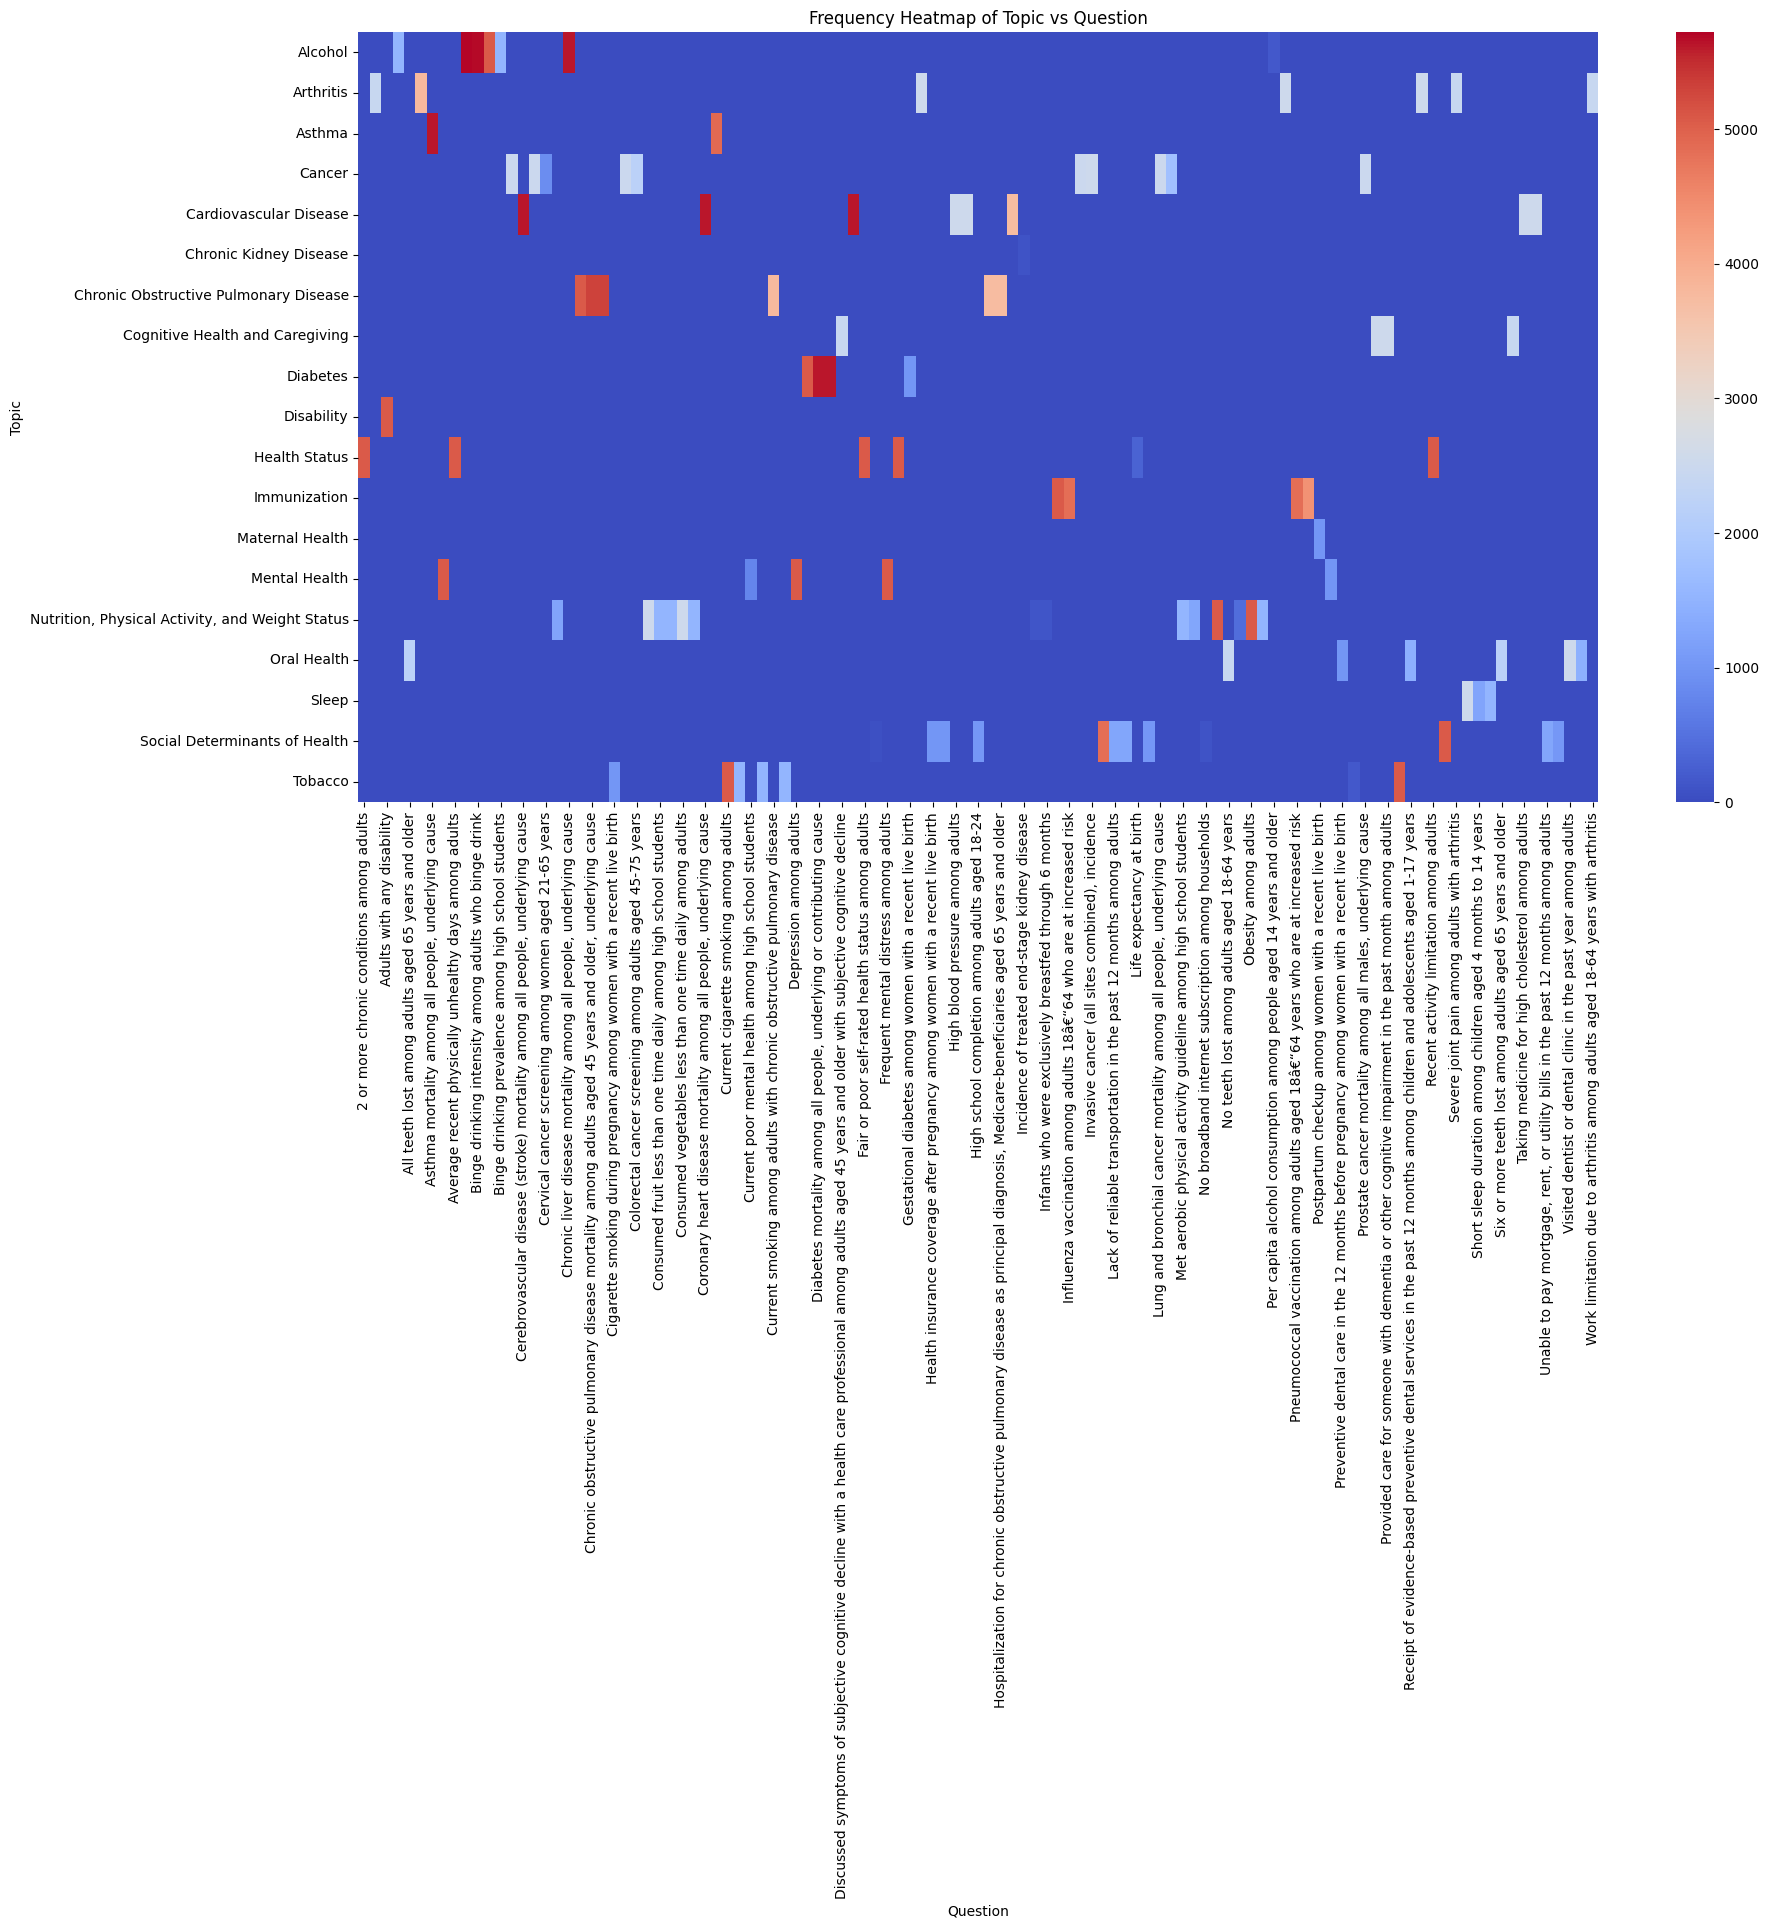

In [97]:
# Create a crosstab of Topic and Question
crosstab = pd.crosstab(data['Topic'], data['Question'])

# Generate a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(crosstab, cmap='coolwarm', annot=False, cbar=True)
plt.title('Frequency Heatmap of Topic vs Question')
plt.xlabel('Question')
plt.ylabel('Topic')
plt.show()

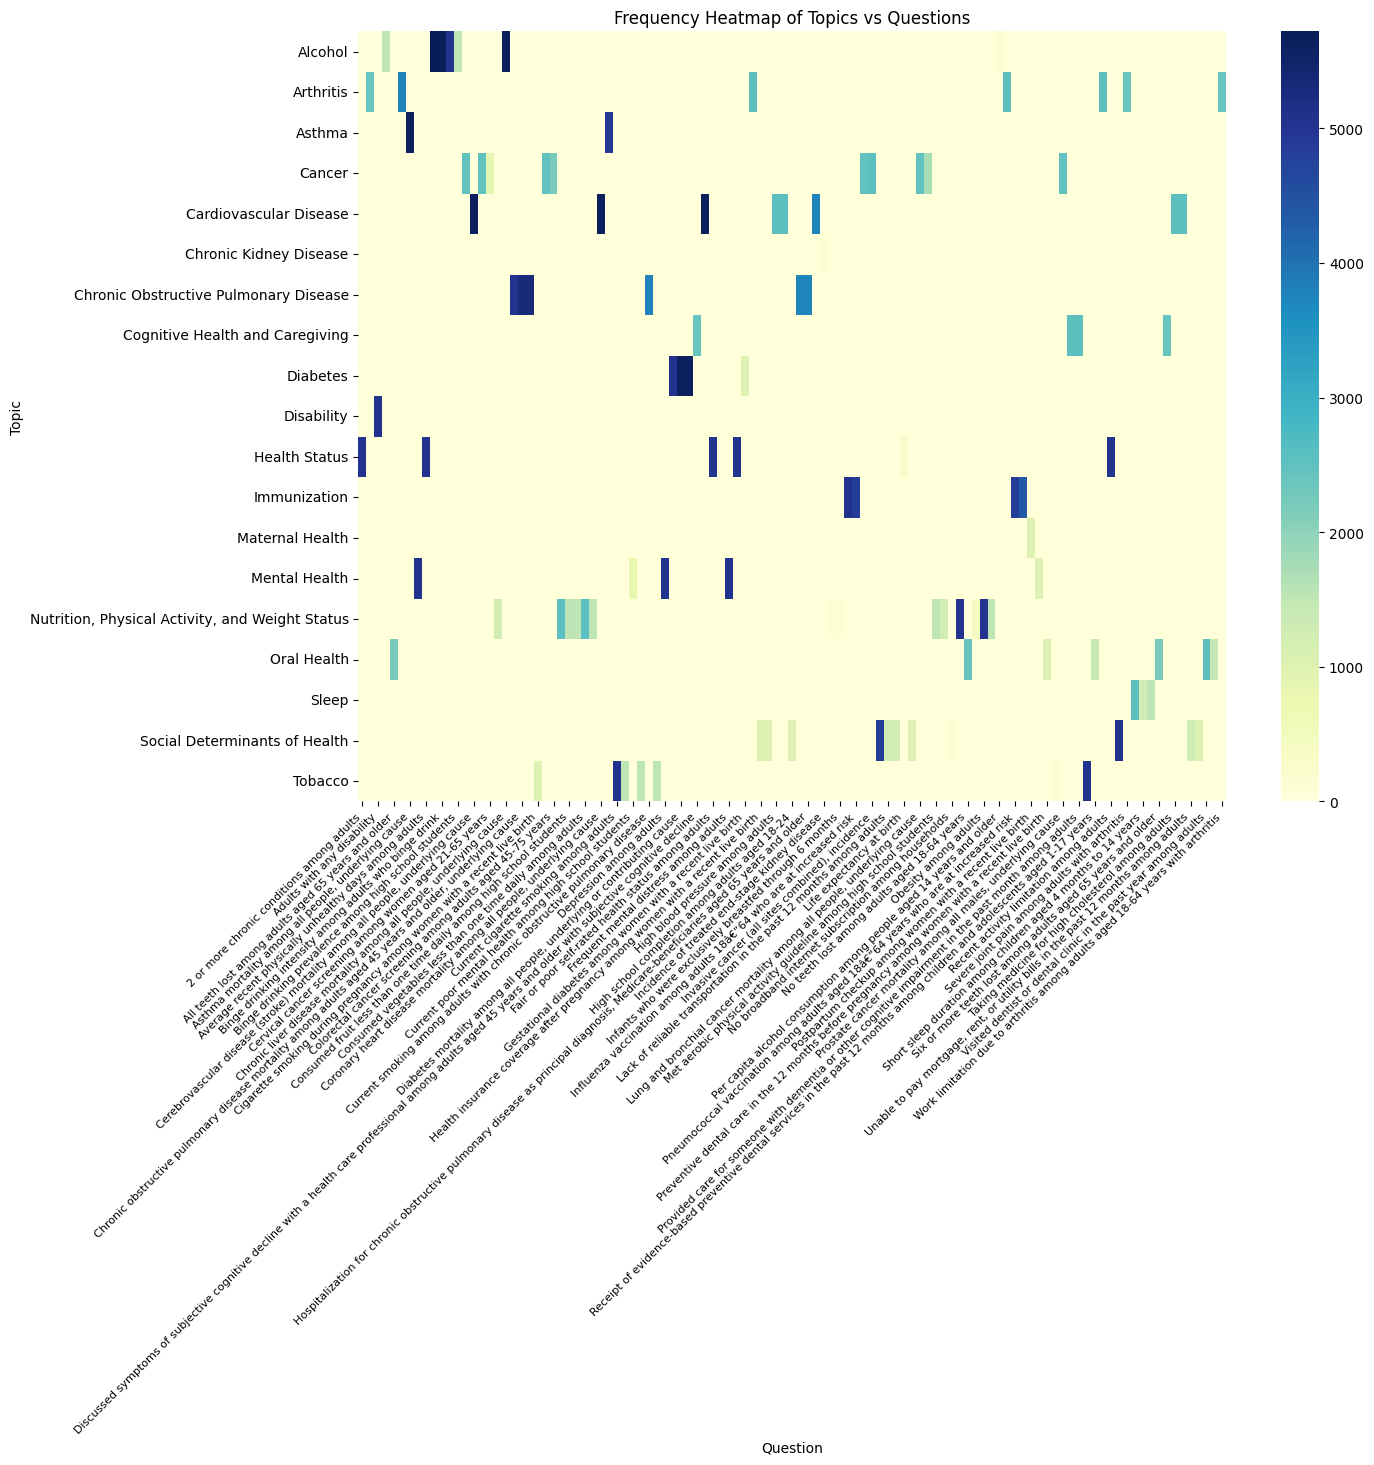

In [98]:
# Create a crosstab of Topic and Question
heatmap_data = pd.crosstab(data['Topic'], data['Question'])

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar=True)
plt.title("Frequency Heatmap of Topics vs Questions")
plt.xlabel("Question")
plt.ylabel("Topic")
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=10)
plt.show()

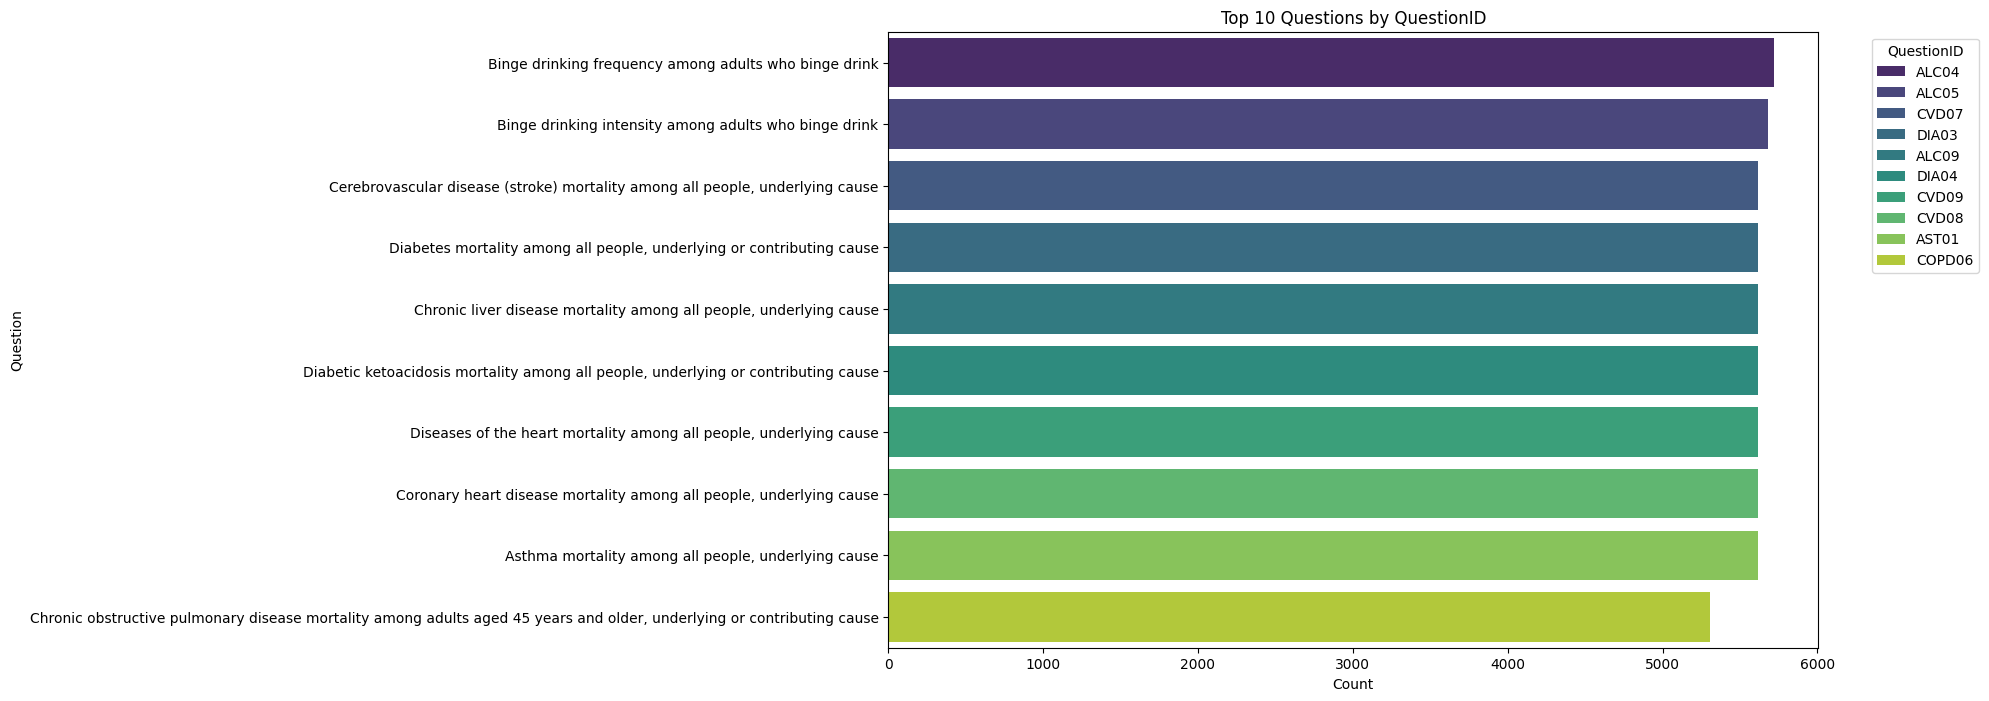

In [99]:
# Group by Question and QuestionID, and count occurrences
question_counts = data.groupby(['Question', 'QuestionID']).size().reset_index(name='Count')

# Sort by Count to show most frequent pairs
question_counts = question_counts.sort_values(by='Count', ascending=False)

# Plot the top 10 Question-QuestionID pairs
plt.figure(figsize=(12, 8))
sns.barplot(data=question_counts.head(10), x='Count', y='Question', hue='QuestionID', dodge=False, palette='viridis')
plt.title("Top 10 Questions by QuestionID")
plt.xlabel("Count")
plt.ylabel("Question")
plt.legend(title="QuestionID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

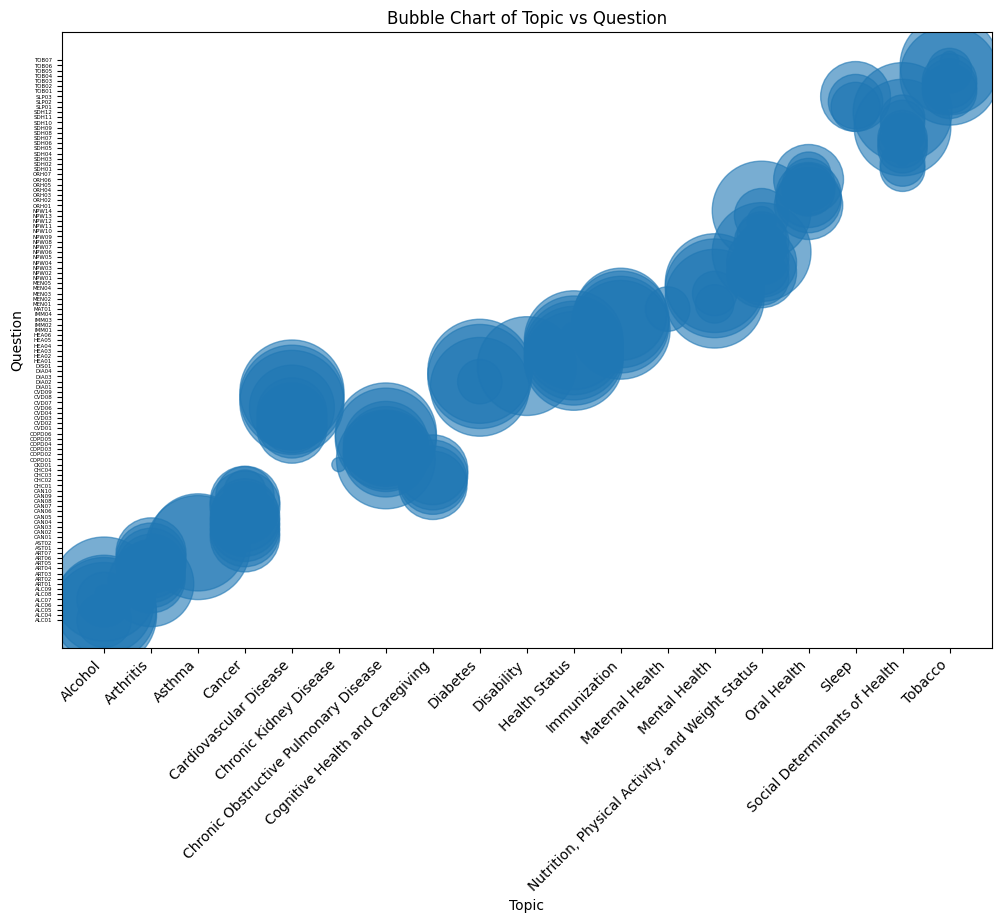

In [100]:
# Create a crosstab of Topic and Question
crosstab = pd.crosstab(data['Topic'], data['QuestionID'])

# Convert crosstab to long format for plotting
bubble_data = crosstab.stack().reset_index()
bubble_data.columns = ['Topic', 'QuestionID', 'Frequency']

# Plot bubble chart
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    bubble_data['Topic'], bubble_data['QuestionID'], 
    s=bubble_data['Frequency'] * 1,  # Scale bubble size
    alpha=0.6
)
plt.title('Bubble Chart of Topic vs Question')
plt.xlabel('Topic')
plt.ylabel('Question')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=4)
plt.show()

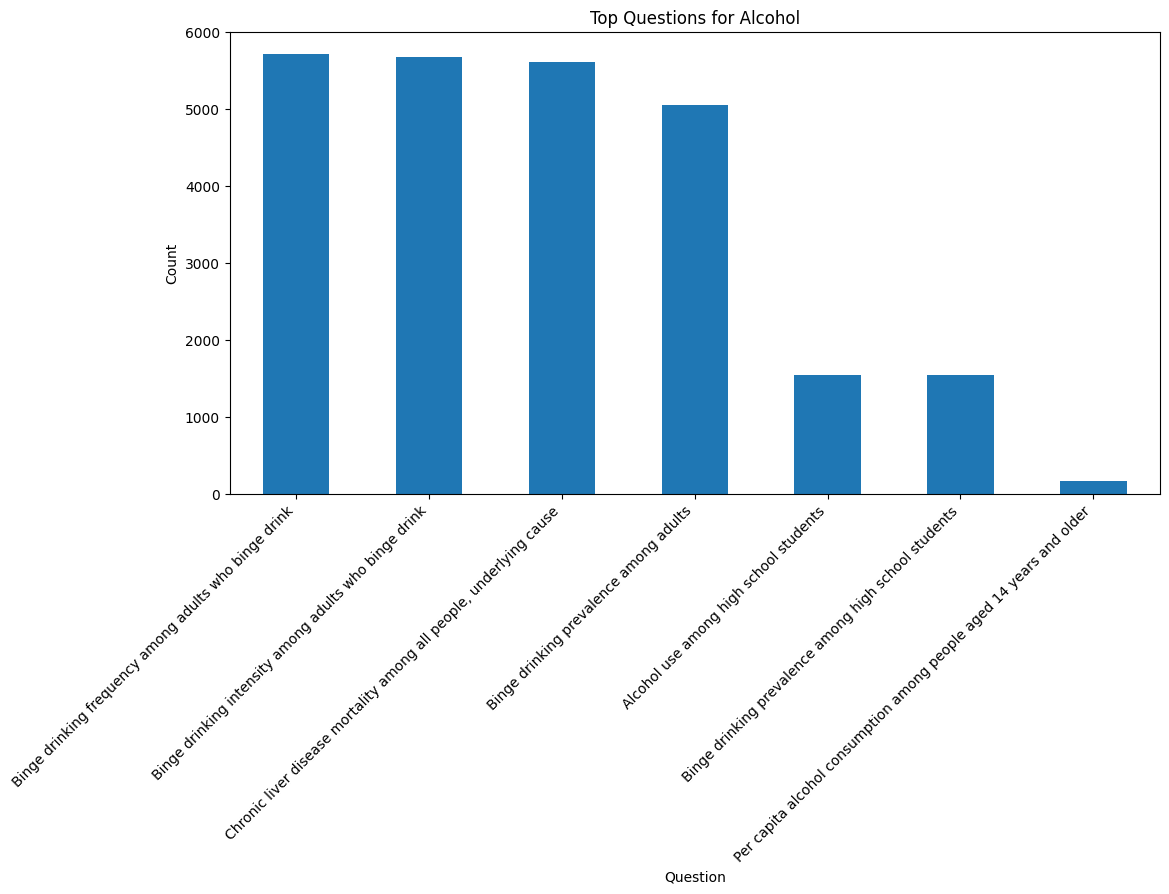

In [101]:
# Filter for a specific topic
specific_topic = "Alcohol"
filtered_df = data[data['Topic'] == specific_topic]

# Count questions
question_counts = filtered_df['Question'].value_counts()

# Plot
question_counts.head(10).plot(kind='bar', figsize=(12, 6))
plt.title(f"Top Questions for {specific_topic}")
plt.xlabel("Question")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

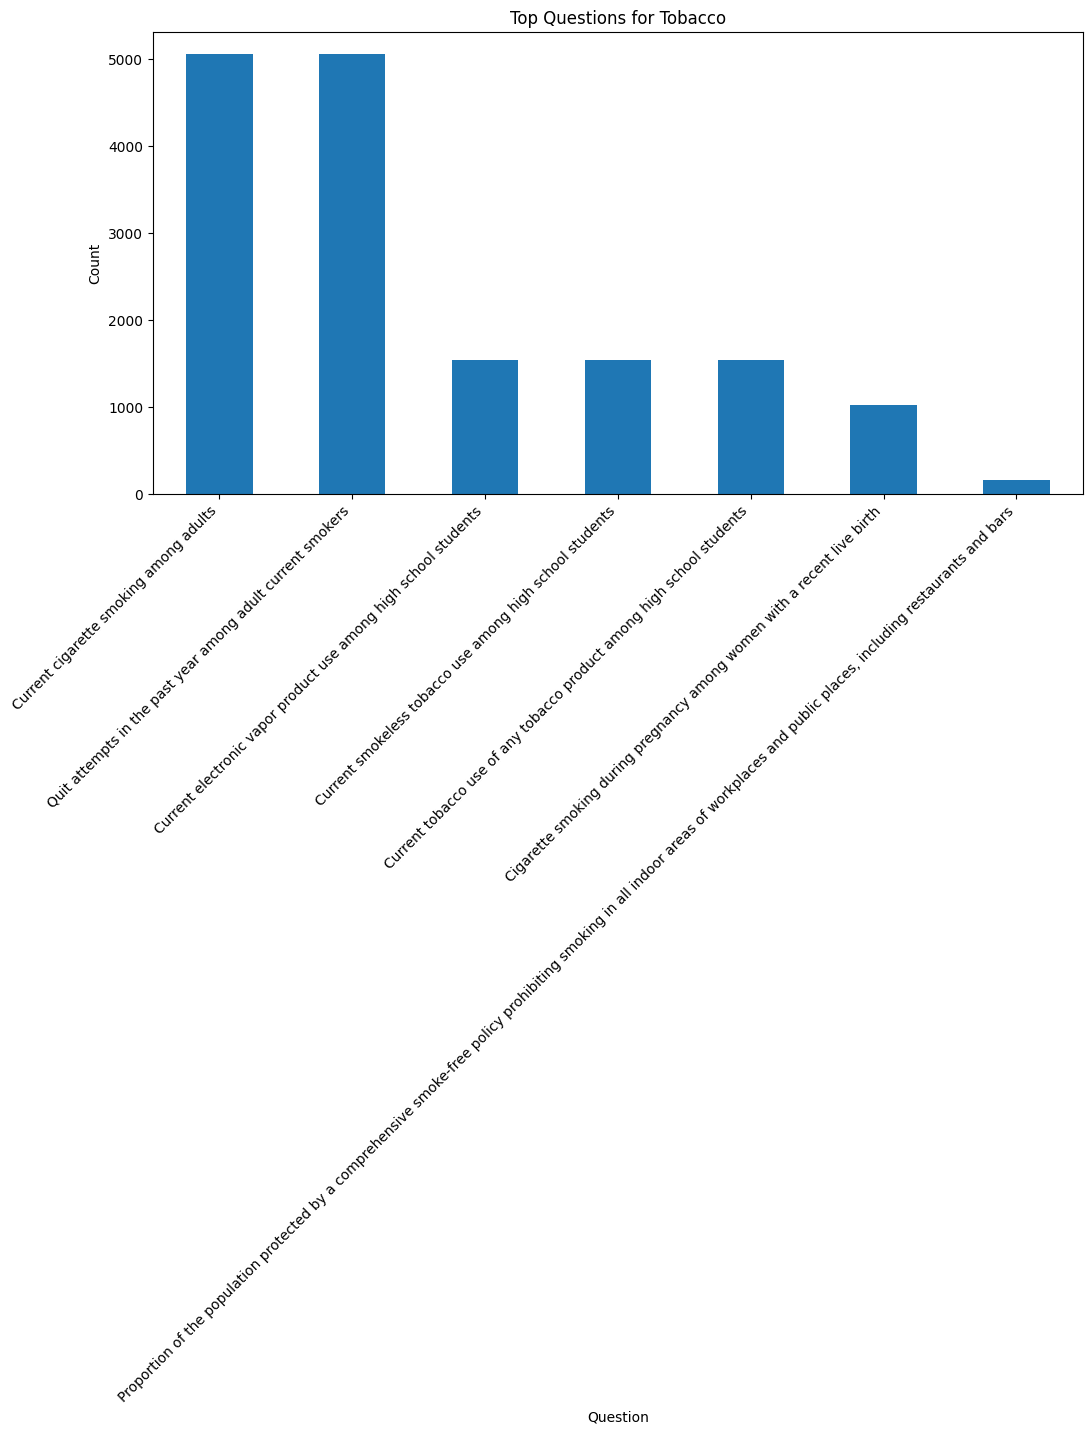

In [102]:
# Filter for a specific topic
specific_topic = "Tobacco"
filtered_df = data[data['Topic'] == specific_topic]

# Count questions
question_counts = filtered_df['Question'].value_counts()

# Plot
question_counts.head(10).plot(kind='bar', figsize=(12, 6))
plt.title(f"Top Questions for {specific_topic}")
plt.xlabel("Question")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

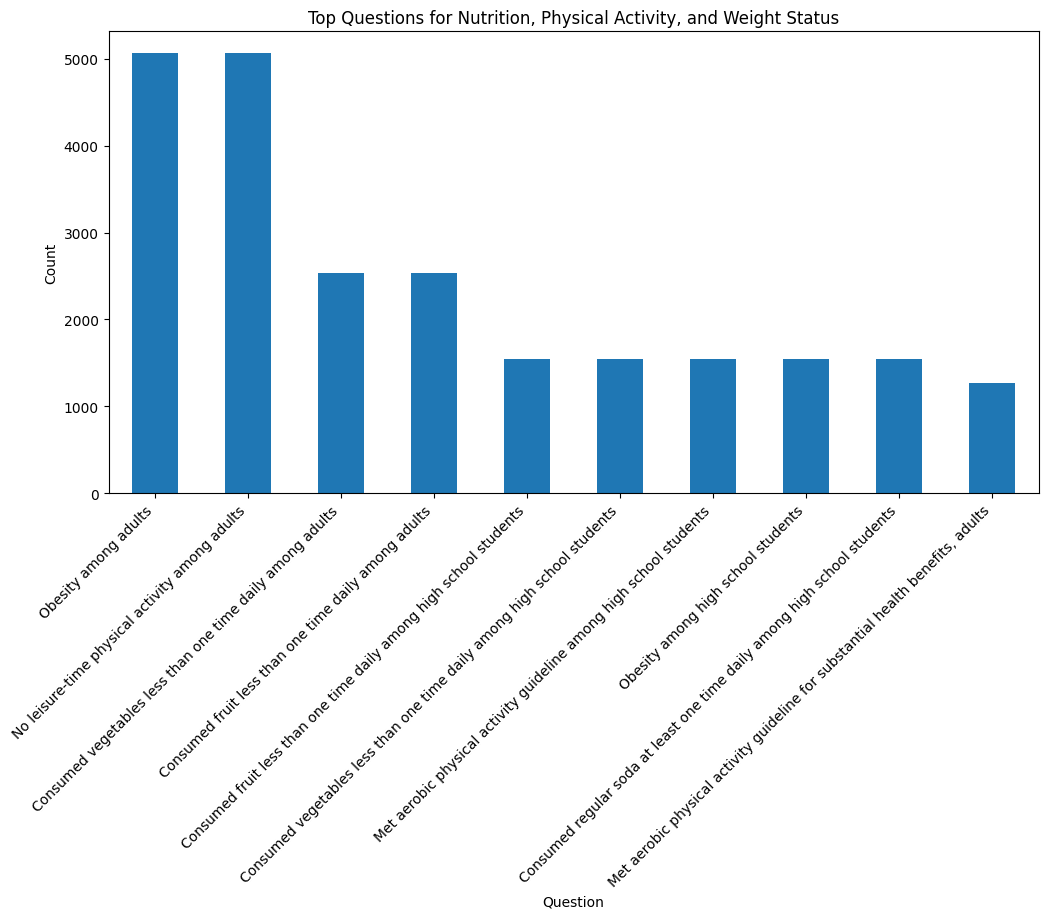

In [103]:
# Filter for a specific topic
specific_topic = "Nutrition, Physical Activity, and Weight Status"
filtered_df = data[data['Topic'] == specific_topic]

# Count questions
question_counts = filtered_df['Question'].value_counts()

# Plot
question_counts.head(10).plot(kind='bar', figsize=(12, 6))
plt.title(f"Top Questions for {specific_topic}")
plt.xlabel("Question")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

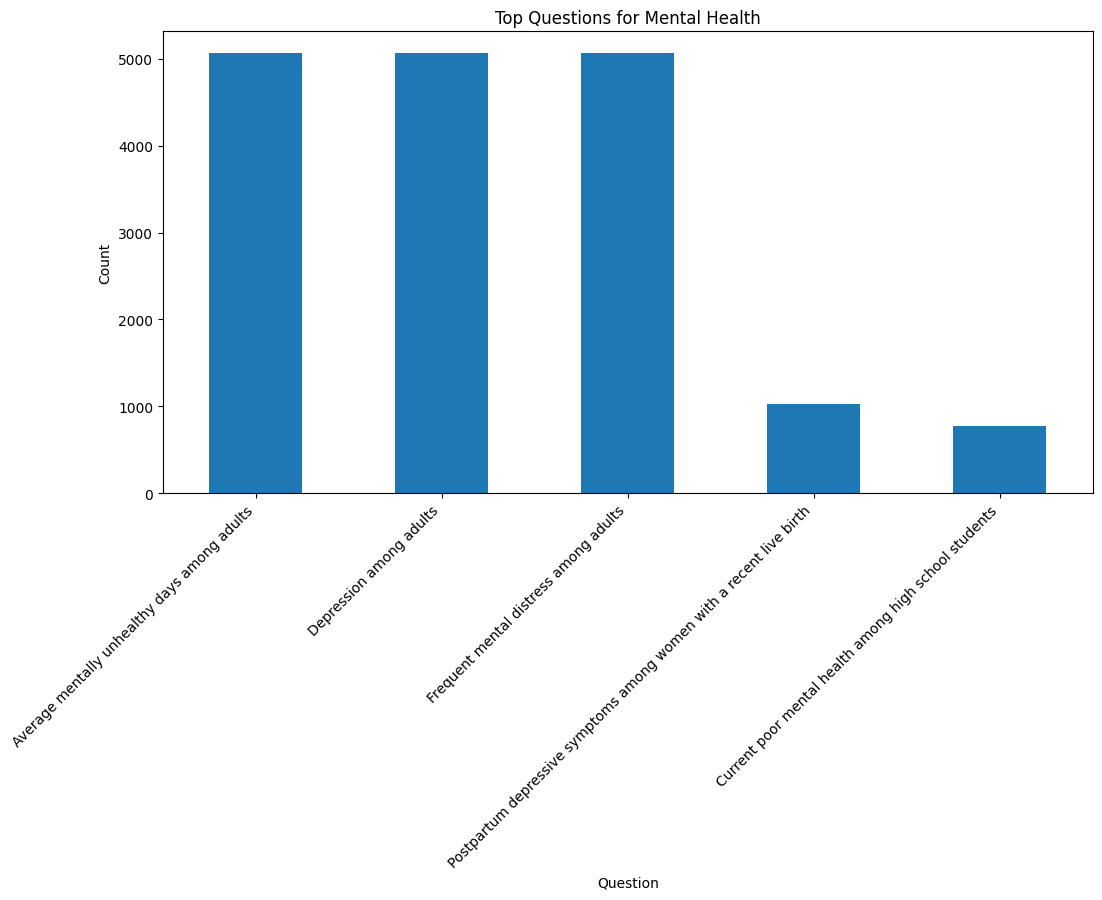

In [104]:
# Filter for a specific topic
specific_topic = "Mental Health"
filtered_df = data[data['Topic'] == specific_topic]

# Count questions
question_counts = filtered_df['Question'].value_counts()

# Plot
question_counts.head(10).plot(kind='bar', figsize=(12, 6))
plt.title(f"Top Questions for {specific_topic}")
plt.xlabel("Question")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

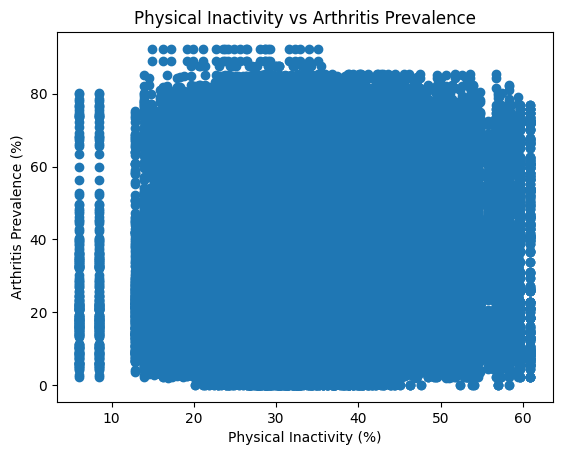

In [105]:
# Scatter plot for physical inactivity vs arthritis prevalence
behavior_df = data[data['Question'].str.contains("physical inactivity", case=False)]
outcome_df = data[data['Question'].str.contains("arthritis", case=False)]

# Merge behavior and outcome data
merged_df = behavior_df.merge(outcome_df, on='Location', suffixes=('_behavior', '_outcome'))

plt.scatter(merged_df['Value_behavior'], merged_df['Value_outcome'])
plt.title("Physical Inactivity vs Arthritis Prevalence")
plt.xlabel("Physical Inactivity (%)")
plt.ylabel("Arthritis Prevalence (%)")
plt.show()

In [106]:
# Aggregate data
topic_question_counts = data.groupby(['Topic', 'Question']).size().reset_index(name='Count')

# Prepare data for Sankey
topics = topic_question_counts['Topic'].unique().tolist()
questions = topic_question_counts['Question'].unique().tolist()

# Map topics and questions to indices
all_nodes = topics + questions
topic_question_counts['Source'] = topic_question_counts['Topic'].apply(lambda x: all_nodes.index(x))
topic_question_counts['Target'] = topic_question_counts['Question'].apply(lambda x: all_nodes.index(x))

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        label=all_nodes,
        pad=10,
        thickness=20,
        color="blue"
    ),
    link=dict(
        source=topic_question_counts['Source'],
        target=topic_question_counts['Target'],
        value=topic_question_counts['Count']
    )
))

fig.update_layout(title_text="Topic vs Question Sankey Diagram", font_size=10, width=1200, height=800)
fig.update_traces(node=dict(pad=15, thickness=20))
fig.show()

In [107]:
# Step 1: Aggregate Low-Frequency Data
min_count_threshold = 50  # Set a minimum frequency threshold
topic_question_counts['Topic'] = topic_question_counts['Topic'].apply(
    lambda x: x if topic_question_counts['Topic'].value_counts()[x] > min_count_threshold else 'Other Topics'
)
topic_question_counts['Question'] = topic_question_counts['Question'].apply(
    lambda x: x if topic_question_counts['Question'].value_counts()[x] > min_count_threshold else 'Other Questions'
)

# Step 2: Prepare Nodes and Mapping
topics = topic_question_counts['Topic'].unique().tolist()
questions = topic_question_counts['Question'].unique().tolist()

# Combine nodes
all_nodes = topics + questions

# Map topics and questions to indices
topic_question_counts['Source'] = topic_question_counts['Topic'].apply(lambda x: all_nodes.index(x))
topic_question_counts['Target'] = topic_question_counts['Question'].apply(lambda x: all_nodes.index(x))

# Step 3: Create Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        label=all_nodes,
        pad=20,  # Increased padding
        thickness=25,  # Increased thickness
        color="blue"
    ),
    link=dict(
        source=topic_question_counts['Source'],
        target=topic_question_counts['Target'],
        value=topic_question_counts['Count']
    )
))

# Update layout for readability
fig.update_layout(
    title_text="Complete Topic vs Question Sankey Diagram (Aggregated for Readability)",
    font_size=14,
    width=1500,  # Wider diagram
    height=1000  # Taller diagram
)
fig.show()

C:\Users\info\AppData\Local\Temp\ipykernel_22568\1671972463.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




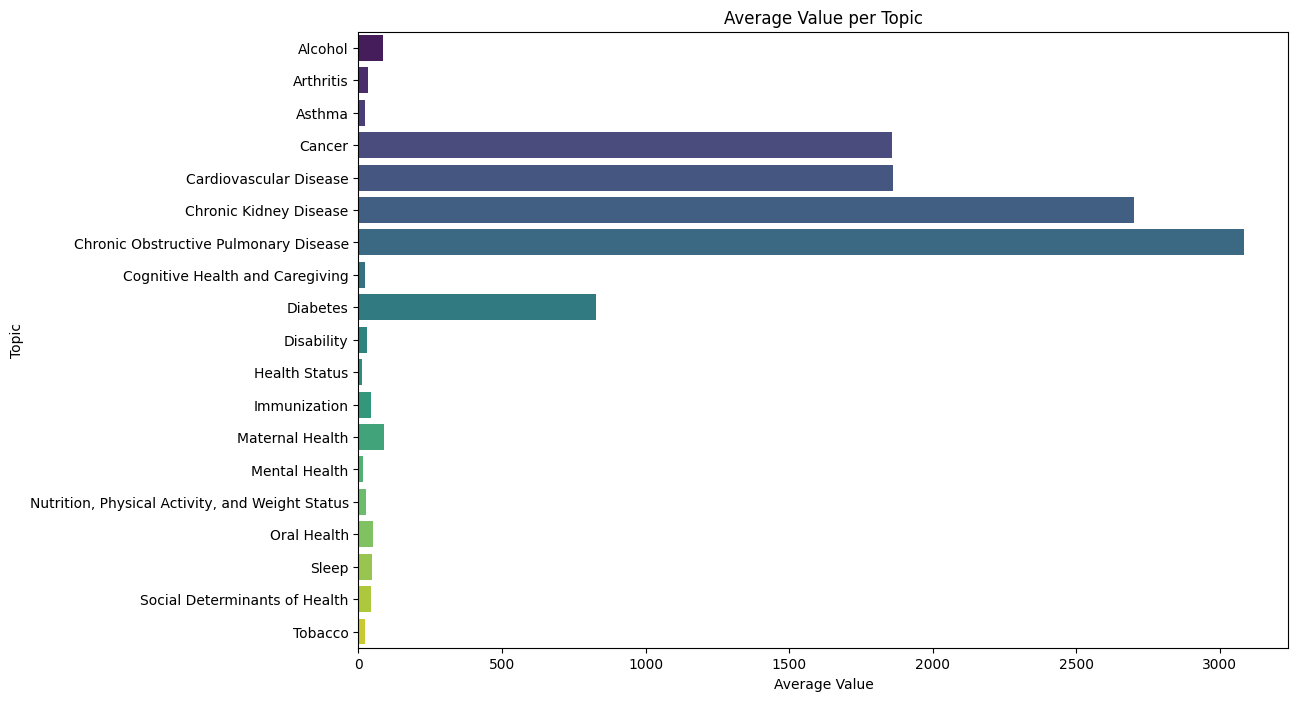

In [108]:
# Convert Value column to numeric (in case of mixed types)
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

# Group by Topic and calculate the mean Value
topic_value_data = data.groupby("Topic")["Value"].mean().reset_index()

# Plot: Bar Chart of Average Value per Topic
plt.figure(figsize=(12, 8))
sns.barplot(data=topic_value_data, x="Value", y="Topic", palette="viridis")
plt.title("Average Value per Topic")
plt.xlabel("Average Value")
plt.ylabel("Topic")
plt.show()

C:\Users\info\AppData\Local\Temp\ipykernel_22568\2607814405.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




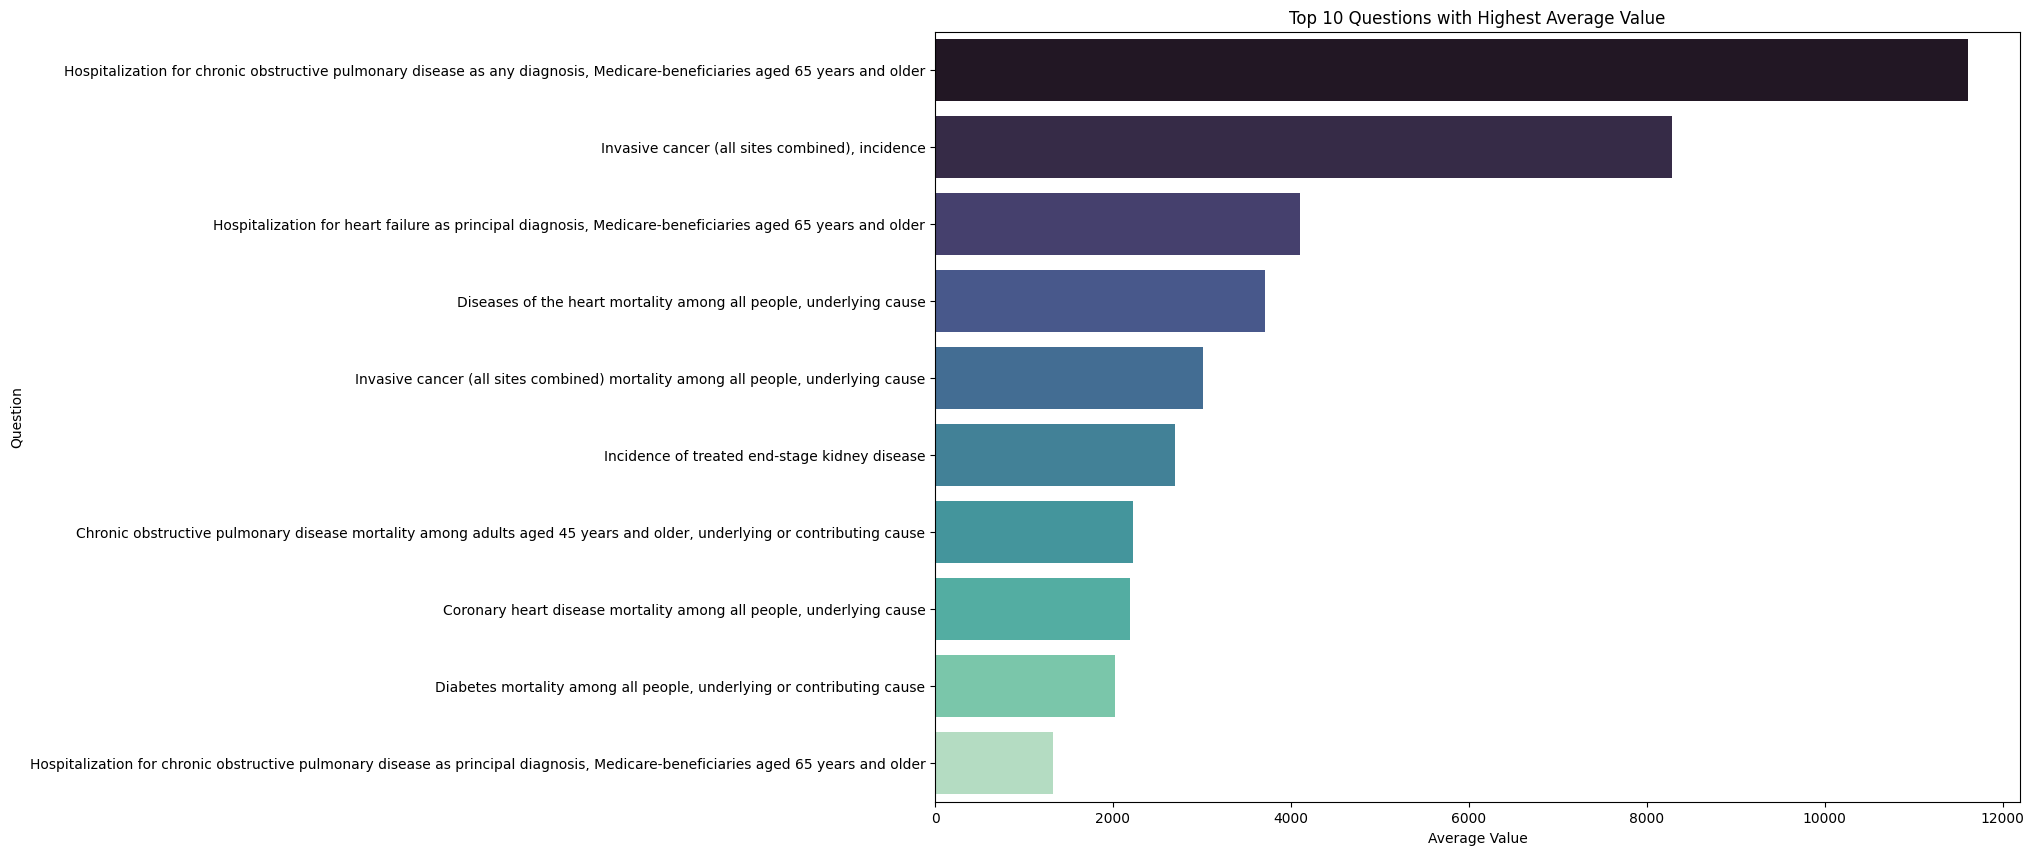

In [109]:
# Group by Question and calculate the mean Value
question_value_data = data.groupby("Question")["Value"].mean().reset_index()

# Filter for top 10 questions with the highest average Value
top_questions = question_value_data.nlargest(10, "Value")

# Plot: Horizontal Bar Chart for Average Value per Question (Top 10)
plt.figure(figsize=(14, 10))
sns.barplot(data=top_questions, x="Value", y="Question", palette="mako")
plt.title("Top 10 Questions with Highest Average Value")
plt.xlabel("Average Value")
plt.ylabel("Question")
plt.show()

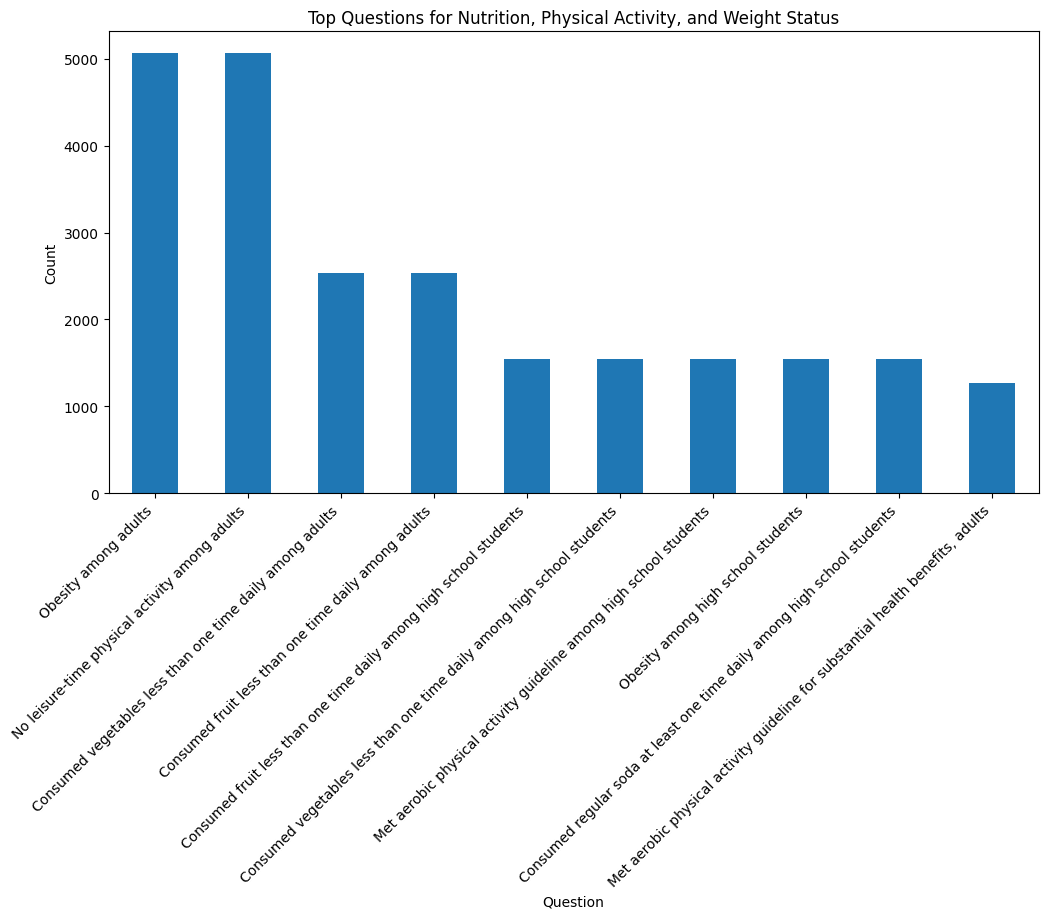

In [110]:
# Filter for a specific topic
specific_topic = "Nutrition, Physical Activity, and Weight Status"
filtered_df = data[data['Topic'] == specific_topic]

# Count questions
question_counts = filtered_df['Question'].value_counts()

# Plot
question_counts.head(10).plot(kind='bar', figsize=(12, 6))
plt.title(f"Top Questions for {specific_topic}")
plt.xlabel("Question")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

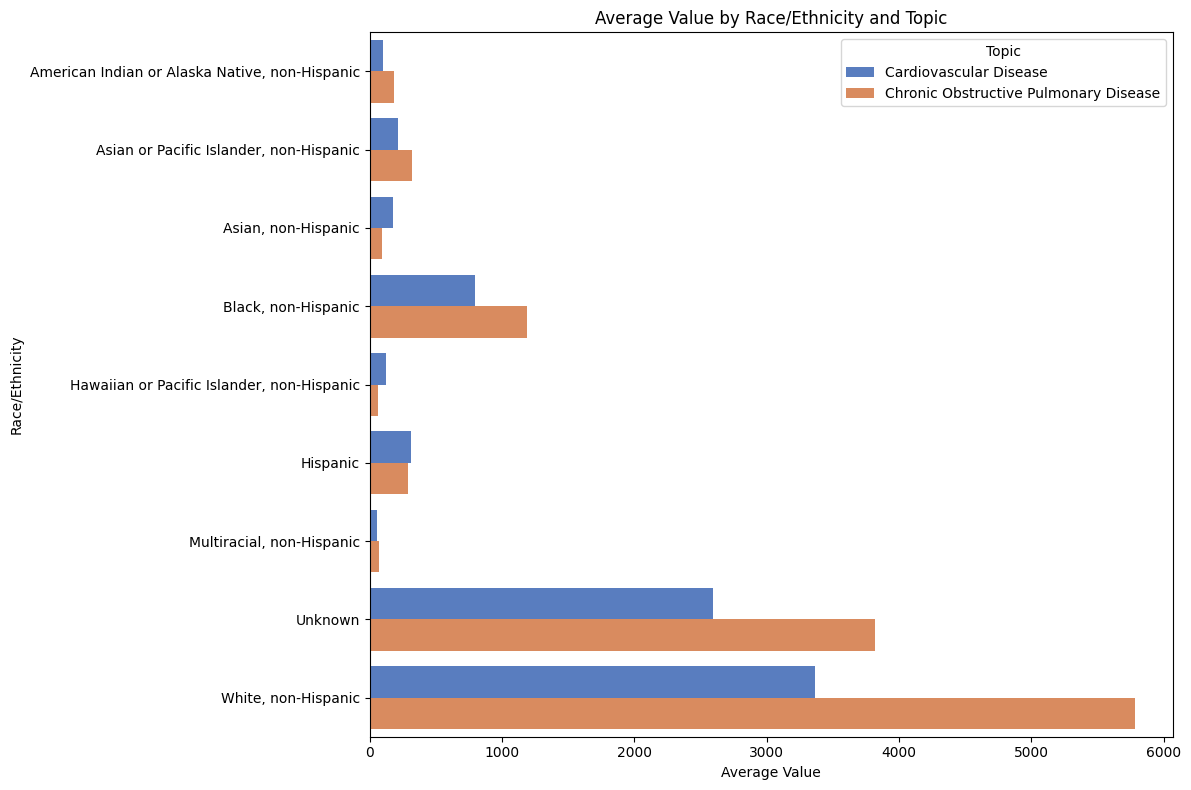

In [144]:
# Group data by Race/Ethnicity and Topic, then calculate the average value
grouped_data = data.groupby(['Race/Ethnicity', 'Topic'])['Value'].mean().reset_index()

# Filter for specific topics for better readability
filtered_topics = ['Cardiovascular Disease', 'Chronic Obstructive Pulmonary Disease']
filtered_data = grouped_data[grouped_data['Topic'].isin(filtered_topics)]

# Create a bar chart with demographic context
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Value',
    y='Race/Ethnicity',
    hue='Topic',
    data=filtered_data,
    palette='muted'
)
plt.title('Average Value by Race/Ethnicity and Topic')
plt.xlabel('Average Value')
plt.ylabel('Race/Ethnicity')
plt.legend(title='Topic')
plt.tight_layout()
plt.show()

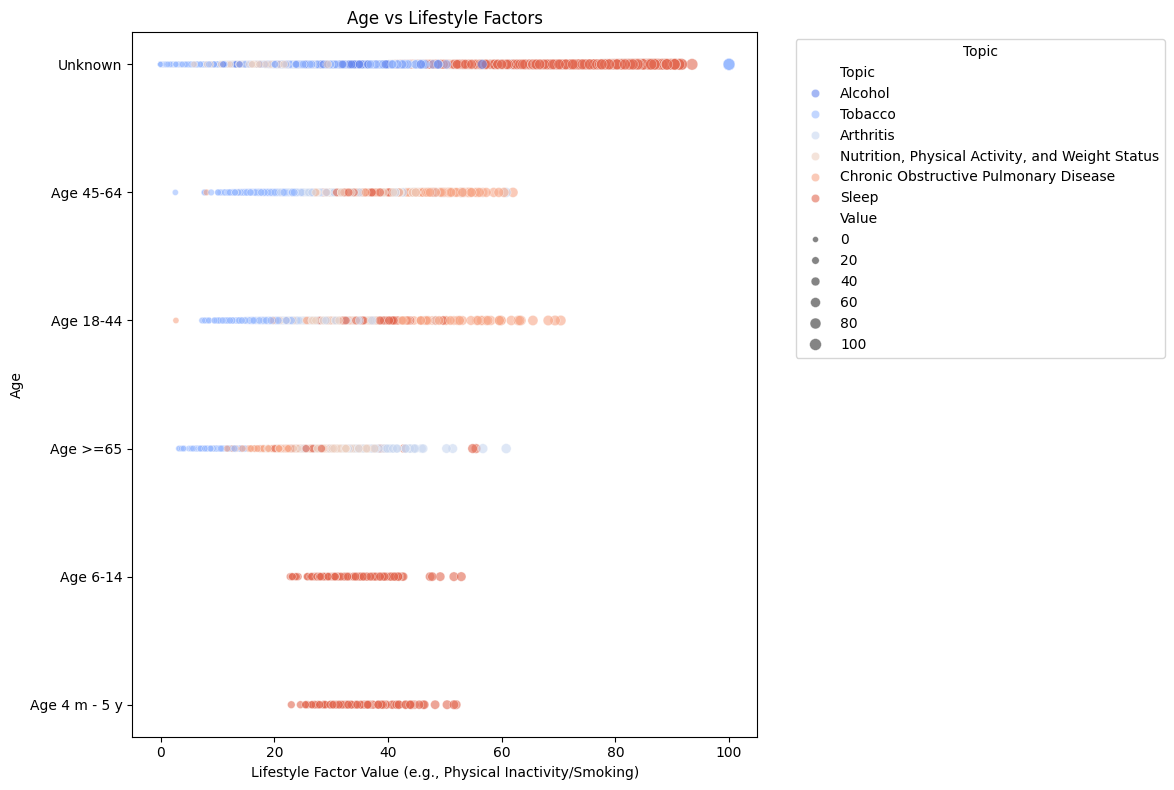

In [112]:
scatter_data = data[data['Question'].str.contains(
    'physical inactivity|smoking|alcohol|obesity|nutrition|sleep|tobacco|exercise', 
    case=False
)]

# Example: Assign a specific demographic column for analysis
demographic_column = 'Age'  # Replace with 'Race/Ethnicity', 'Sex', etc.

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Value',  # The numeric value (e.g., percentage or rate)
    y=demographic_column,
    hue='Topic',  # Optional: use topics to add context
    size='Value',  # Bubble size corresponds to the value
    data=scatter_data,
    alpha=0.6,
    palette='coolwarm'
)

# Add plot details
plt.title(f'{demographic_column} vs Lifestyle Factors')
plt.xlabel('Lifestyle Factor Value (e.g., Physical Inactivity/Smoking)')
plt.ylabel(demographic_column)
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

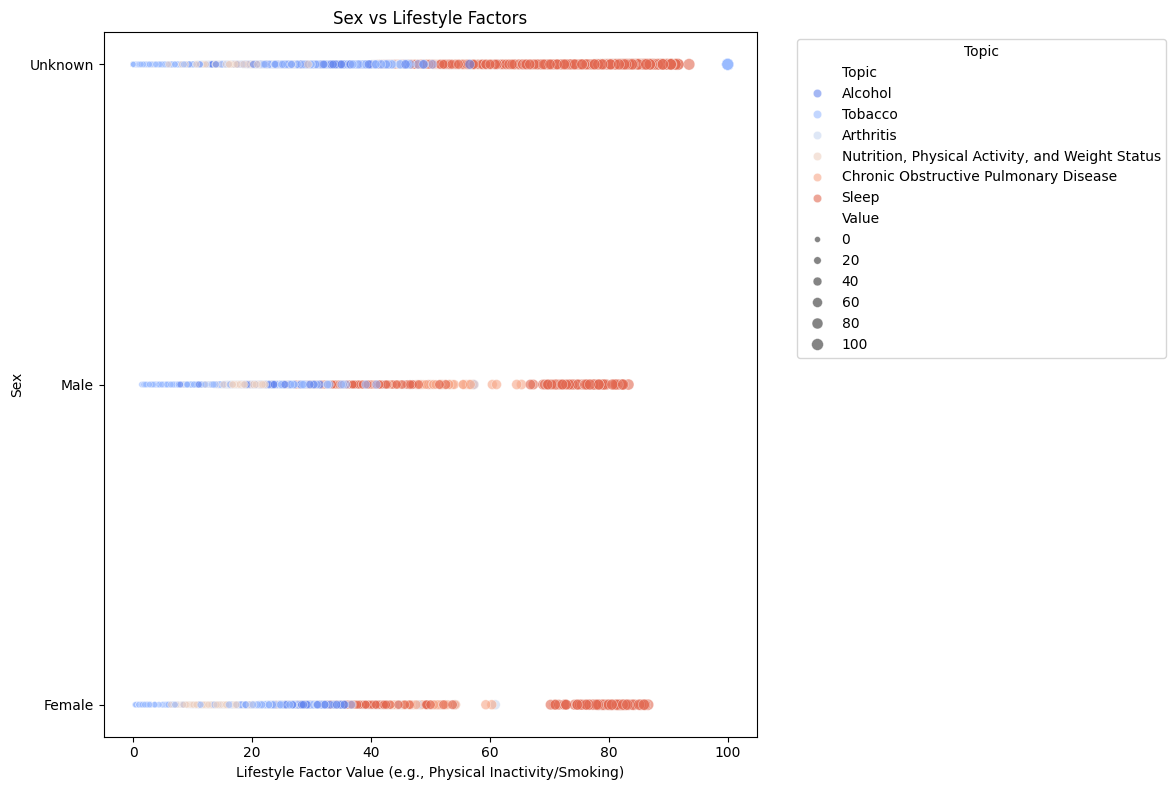

In [113]:
scatter_data = data[data['Question'].str.contains(
    'physical inactivity|smoking|alcohol|obesity|nutrition|sleep|tobacco|exercise', 
    case=False
)]

# Example: Assign a specific demographic column for analysis
demographic_column = 'Sex'  # Replace with 'Race/Ethnicity', 'Sex', etc.

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Value',  # The numeric value (e.g., percentage or rate)
    y=demographic_column,
    hue='Topic',  # Optional: use topics to add context
    size='Value',  # Bubble size corresponds to the value
    data=scatter_data,
    alpha=0.6,
    palette='coolwarm'
)

# Add plot details
plt.title(f'{demographic_column} vs Lifestyle Factors')
plt.xlabel('Lifestyle Factor Value (e.g., Physical Inactivity/Smoking)')
plt.ylabel(demographic_column)
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

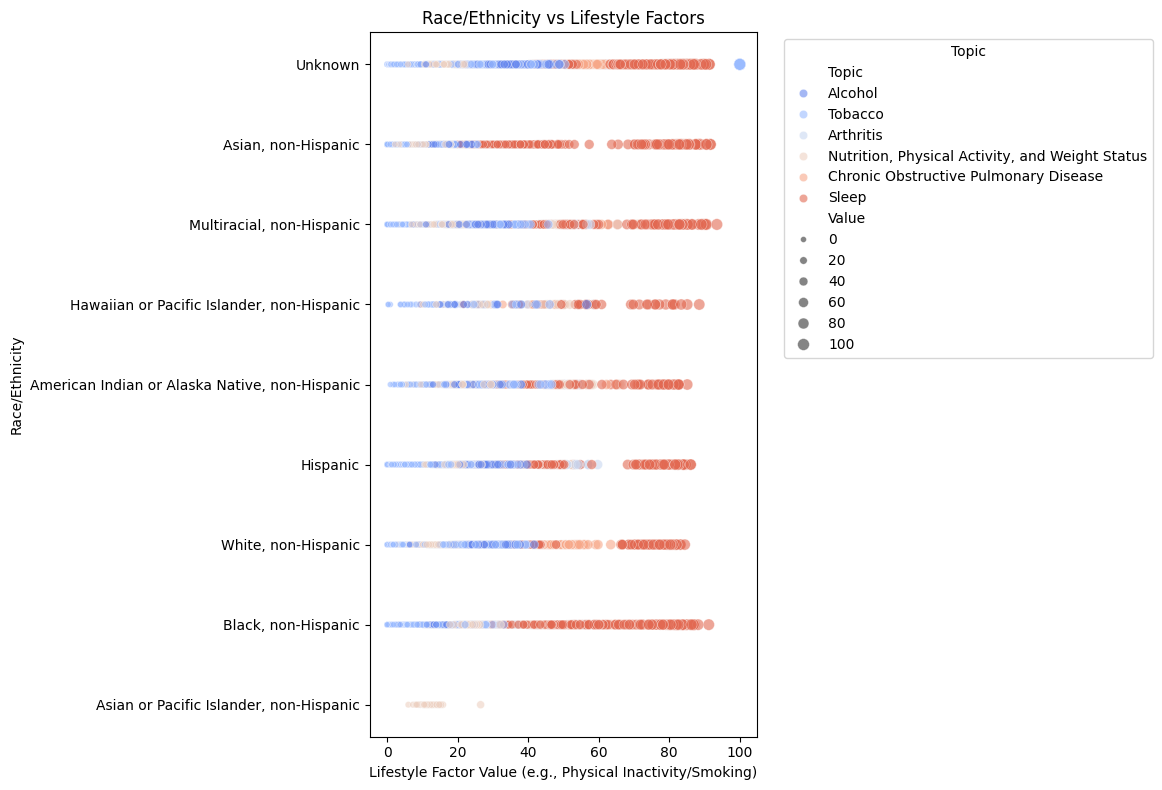

In [114]:
scatter_data = data[data['Question'].str.contains(
    'physical inactivity|smoking|alcohol|obesity|nutrition|sleep|tobacco|exercise', 
    case=False
)]

# Example: Assign a specific demographic column for analysis
demographic_column = 'Race/Ethnicity'  # Replace with 'Race/Ethnicity', 'Sex', etc.

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Value',  # The numeric value (e.g., percentage or rate)
    y=demographic_column,
    hue='Topic',  # Optional: use topics to add context
    size='Value',  # Bubble size corresponds to the value
    data=scatter_data,
    alpha=0.6,
    palette='coolwarm'
)

# Add plot details
plt.title(f'{demographic_column} vs Lifestyle Factors')
plt.xlabel('Lifestyle Factor Value (e.g., Physical Inactivity/Smoking)')
plt.ylabel(demographic_column)
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

DASH LIFESTYLE INTERACTIVE VISUALS

In [143]:
# Process data for the bar chart (Top 10 Topics by Average Value)
top_topics = data.groupby('Topic')['Value'].mean().reset_index()
top_topics = top_topics.sort_values(by='Value', ascending=False).head(10)

# Process data for heatmap (Top 10 Topics and Questions)
heatmap_data = (
    data.pivot_table(index='Topic', columns='Question', values='Value', aggfunc='mean')
    .iloc[:10, :10]  # Top 10 topics and questions
    .fillna(0)       # Replace NaN with 0
)

# Process data for bubble chart (Top 10 Topics by Average Value)
bubble_data = top_topics.copy()

# Initialize Dash app
app = Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Comprehensive Dash App with Improved Visualizations"),
    
    # Bar Chart
    html.Div([
        html.H2("Bar Chart: Average Value by Top 10 Topics"),
        dcc.Graph(
            id='bar-chart',
            figure=px.bar(
                top_topics,
                x='Topic',
                y='Value',
                title="Bar Chart: Top 10 Topics by Average Value",
                labels={'Value': 'Average Value'},
                height=500
            ).update_layout(xaxis_tickangle=45)
        )
    ], style={'margin-bottom': '50px'}),

    # Scatter Plot
    html.Div([
        html.H2("Scatter Plot: Topic vs Value"),
        dcc.Dropdown(
            id='topic-dropdown',
            options=[{'label': topic, 'value': topic} for topic in data['Topic'].unique()],
            value=data['Topic'].unique()[0],
            placeholder="Select a Topic",
            clearable=False
        ),
        dcc.Graph(id='scatter-plot', style={'height': '500px'})
    ], style={'margin-bottom': '50px'}),

    # Heatmap
    html.Div([
        html.H2("Heatmap: Top 10 Topics vs Questions"),
        dcc.Graph(
            id='heatmap',
            figure=px.imshow(
                heatmap_data,
                title="Heatmap: Average Value for Top 10 Topics and Questions",
                labels=dict(color="Average Value", x="Questions", y="Topics"),
                height=800,
                width=1000
            ).update_layout(
                xaxis=dict(tickangle=45, automargin=True),
                yaxis=dict(automargin=True),
                coloraxis_colorbar=dict(title="Average Value")
            )
        )
    ], style={'margin-bottom': '50px'}),

    # Bubble Chart
    html.Div([
        html.H2("Bubble Chart: Top 10 Topics by Average Value"),
        dcc.Graph(
            id='bubble-chart',
            figure=px.scatter(
                bubble_data,
                x='Topic',
                y='Value',
                size='Value',
                color='Topic',
                title="Bubble Chart: Top 10 Topics by Average Value",
                labels={'Value': 'Average Value'},
                height=500
            ).update_layout(xaxis_tickangle=45)
        )
    ])
])

# Callback for the Scatter Plot
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('topic-dropdown', 'value')]
)
def update_scatter(selected_topic):
    filtered_data = data[data['Topic'] == selected_topic].head(20)  # Limit to 20 questions
    fig = px.scatter(
        filtered_data,
        x='Value',
        y='Question',
        title=f"Scatter Plot for Topic: {selected_topic}",
        labels={'Value': 'Value'},
        color='Question',
        height=500
    )
    fig.update_layout(yaxis=dict(tickangle=0))
    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)

In [116]:
import webbrowser
from threading import Timer

def open_browser():
    webbrowser.open_new("http://127.0.0.1:8050/")

if __name__ == "__main__":
    Timer(1, open_browser).start()  # Open browser after 1 second